In [1]:
from raytracing.raytracing_lib import RayTracing
import numpy as np
import pandas as pd
from numpy import linspace, isnan, array
import matplotlib.pyplot as plt
%matplotlib widget

import warnings
warnings.filterwarnings("ignore", message=".*delta_grad == 0.0.*")

In [47]:
from numpy import exp, conj, asarray, pi, argwhere, mean, round, ones, argsort, cumsum, rad2deg, deg2rad, sqrt, inf,errstate, where,sign, nan, tan, array, dot, arccos, degrees,arctan, nan, full, isnan,vstack,linspace, isfinite,arcsin, argmin,random,linalg,clip, cos, sin
from scipy.optimize import minimize_scalar, minimize,newton, brentq, least_squares
from math import isclose
from pandas import DataFrame,MultiIndex
from matplotlib.pyplot import subplots,show,grid
from scipy.interpolate import interp1d

In [3]:
# wl= 1
# r= 1
# dist=10
# dist_after= 100

# R=50
# t=6
# ap= 20
# t_ast=5

# object_height=2*0
# reverse=False


# RT= RayTracing(object_height=object_height, wl_um=wl,beam_radius=r, Obj_2_Ent_tickness=dist,Ent_thickness=t_ast)

# # RT.add_Lens_ZMX('A230', thickness_after=dist_after, reverse=reverse)

# RT.add_Lens_ZMX('C105TMD', thickness_after=10, reverse=reverse)
# # RT.add_Lens_ZMX('A230', thickness_after=10, reverse= not reverse)

# fig,ax= plt.subplots(figsize=(10,4), tight_layout=True)
# RT.set_Stop(1.2, 2)
# # RT.set_Stop(1.5, 4)
# fig,ax, Results= RT.Plot_System(fig,ax, 51, show_reference=False, ST_Active=True, show_obj= False,xscale='linear', yscale='linear',
#                                 solver= 'default',ray_color='tab:green', lens_layout=True)

# # fig,ax, Results= RT.Plot_System(fig,ax, 4, show_reference=False, ST_Active=True, show_obj= False,xscale='linear', yscale='linear',
# #                                 solver= 'chief', lens_layout=True)

# # fig,ax, Results= RT.Plot_System(fig,ax, 4, show_reference=False, ST_Active=True, show_obj= False,xscale='linear', yscale='linear',
# #                                 solver= 'marginal',ray_color='tab:blue', lens_layout=True, marginal_ang_tol=1e-4)

# # fig,ax, Results= RT.Plot_System(fig,ax, 1, show_reference=False, ST_Active=False, show_obj= False,xscale='linear', yscale='linear',solver= 'arbitrary',ray_color='tab:red', lens_layout=False, u_rad= 0.15739310909805582)
# ax.set_ylim(-4,4)

In [4]:
wl= 1
r= 5
dist=10
dist_after= 100

R=50
t=6
ap= 20
t_ast=5

object_height=2*0
reverse=False


RT= RayTracing(object_height=object_height, wl_um=wl,beam_radius=r, Obj_2_Ent_tickness=dist,Ent_thickness=t_ast)

# RT.add_Lens_ZMX('A230', thickness_after=dist_after, reverse=reverse)

RT.add_Lens_ZMX('C453TMD-C', thickness_after=35, reverse=reverse)
RT.add_Lens_ZMX('C453TMD-C', thickness_after=36.5, reverse= not reverse)


RT.set_Stop(.5, 1)
# RT.set_Stop(5, 3)
# RT.set_Stop(1.5, 3)
# RT.set_Stop(1.5, 4)


In [5]:
# fig,ax= plt.subplots(figsize=(10,4), tight_layout=True)

# ST_Active= True
# show_obj=  True
# xscale='linear'
# yscale='linear'
# Lens_layout= True

# fig,ax, Results= RT.Plot_System(fig,ax, 3, ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=xscale,
#                                 solver= 'default',ray_color='tab:green', lens_layout=Lens_layout)
# # Lens_layout=False
# # fig,ax, Results= RT.Plot_System(fig,ax, 4,  ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=xscale,
# #                                 solver= 'marginal',ray_color='tab:blue', lens_layout=Lens_layout, marginal_ang_tol=1e-8)

# # Lens_layout=False
# # fig,ax, Results= RT.Plot_System(fig,ax, 4,  ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=xscale,
#                                 # solver= 'chief',ray_color='tab:red', lens_layout=Lens_layout, marginal_ang_tol=1e-8, FOV_deg=5, chief_guess=0)

# # fig,ax, Results= RT.Plot_System(fig,ax, 1, show_reference=False, ST_Active=False, show_obj= show_obj,xscale='linear', yscale='linear',
# # solver= 'arbitrary',ray_color='orange', lens_layout=False, linestyle='--', y_mm=2.1352429584920913, h_obj= 1.7632698070846498) #u_rad= 0.08217798084502662+1e-3, h_obj=0)

# ax.set_ylim(-25,25)

In [6]:
# # --- Generate deterministic SMF rays ---
MFD = 10.4  # mm (10.4 µm)
n_rays= 21
# fig,ax= plt.subplots(figsize=(10,4), tight_layout=True)

# ST_Active= True
# show_obj=  True
# xscale='linear'
# yscale='linear'
# Lens_layout= True


# fig,ax, Results= RT.plot_Gaussian_System(fig,ax, n_rays, ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=xscale,
#                                          solver= 'Fiber',ray_color='tab:green', lens_layout=Lens_layout,MFD_um=MFD)
        

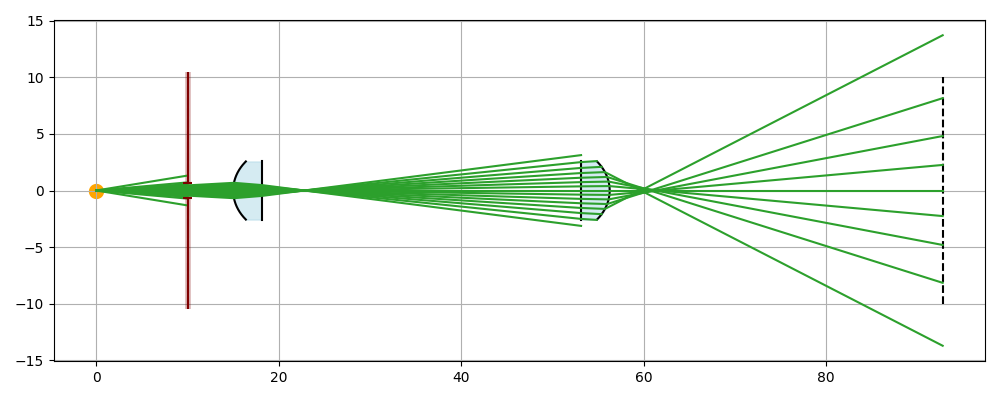

In [7]:
w0_mm=MFD*1e-3/2

fig,ax= plt.subplots(figsize=(10,4), tight_layout=True)

ST_Active= True
show_obj=  True
xscale='linear'
yscale='linear'
Lens_layout= True


fig,ax, Results= RT.plot_Gaussian_System(fig,ax, n_rays, ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=xscale,
                                         solver= 'gaussian',ray_color='tab:green', lens_layout=Lens_layout,w0_mm=w0_mm, truncate_sigma_gaussian=3)
        

In [8]:
Results2= [ RT.Check_Stop(result, RT.Surfaces, dz=0, ST_Active=True) for result in Results]

In [9]:
y_img= array([float(df["Y_mm"].iloc[-1]) for df in Results2 if "Y_mm" in df.columns])
u_img= array([float(df["U_rad"].iloc[-1]) for df in Results2 if "U_rad" in df.columns])
y_ent= array([float(df["Y_mm"].iloc[0]) for df in Results2 if "Y_mm" in df.columns])
u_ent= array([float(df["U_rad"].iloc[0]) for df in Results2 if "U_rad" in df.columns])

y_fib, u_fib, weight= RT.gaussian_fiber(n_rays, MFD)


In [10]:

eta = RT.fiber_coupling_1D(y_img, u_img, wavelength_um=1.0, MFD_um=10.4, weight_rays=weight)
eta

0.15654408321096694

In [11]:
T= RT.system_transmission(y_fib,y_ent, y_img, "2fib", weight )
T

0.7958003975899153

In [12]:
T*eta

0.12457784365963627

In [13]:
RT.All_Lenses_Printing()

aspherical ===> ['354453', 'A230', 'A390-A', 'A390-B', 'C105TMD', 'C453TMD-B', 'C453TMD-C', 'C453TMD', 'CBB', 'CFC5A-B']
bi-convex_spherical ===> ['LB1471']
plano_convex_spherical ===> ['LA1027', 'LA1131', 'LA1172', 'LA1259', 'LA1509', 'LA1951', 'LA4647-1550']


In [89]:
wl= 1.55
r= 5
dist=30.77
dist_after= 100

R=50
t=6
ap= 20
t_ast=5

object_height=2*0
reverse=False


RT= RayTracing(object_height=object_height, wl_um=wl,beam_radius=r, Obj_2_Ent_tickness=dist,Ent_thickness=t_ast)

##Island 1

RT.add_Lens_ZMX('LA4647-1550', thickness_after=8.65, reverse=reverse)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=3,    aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=8.65, aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_Lens_ZMX('LA4647-1550', thickness_after=24.25, reverse=not reverse)
RT.add_surface(curvature_radius= 0,thickness=3.7, aperture_Radius=5,material='F_SILICA', surface_type='sph', stop_size=5)
RT.add_surface(curvature_radius= 0,thickness=63.59, aperture_Radius=5,material='air' , surface_type='sph', stop_size=5)


##Island 2

RT.add_Lens_ZMX('LA4647-1550', thickness_after=8.65, reverse=reverse)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=3,    aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=8.65, aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_Lens_ZMX('LA4647-1550', thickness_after=24.25, reverse=not reverse)
RT.add_surface(curvature_radius= 0,thickness=3.7, aperture_Radius=5,material='F_SILICA', surface_type='sph', stop_size=5)
RT.add_surface(curvature_radius= 0,thickness=63.59, aperture_Radius=5,material='air' , surface_type='sph', stop_size=5)


##Island 3

RT.add_Lens_ZMX('LA4647-1550', thickness_after=8.65, reverse=reverse)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=3,    aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=8.65, aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_Lens_ZMX('LA4647-1550', thickness_after=24.25, reverse=not reverse)
RT.add_surface(curvature_radius= 0,thickness=3.7, aperture_Radius=5,material='F_SILICA', surface_type='sph', stop_size=5)
RT.add_surface(curvature_radius= 0,thickness=63.59, aperture_Radius=5,material='air' , surface_type='sph', stop_size=5)



##Island 4

RT.add_Lens_ZMX('LA4647-1550', thickness_after=8.65, reverse=reverse)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=3,    aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=15.5, aperture_Radius=2.5/2,material='LT-O-II', surface_type='sph', stop_size=2.5)
RT.add_surface(curvature_radius= 0,thickness=8.65, aperture_Radius=2.5/2,material='air' , surface_type='sph', stop_size=2.5)
RT.add_Lens_ZMX('LA4647-1550', thickness_after=24.25, reverse=not reverse)
RT.add_surface(curvature_radius= 0,thickness=3.7, aperture_Radius=5,material='F_SILICA', surface_type='sph', stop_size=5)
RT.add_surface(curvature_radius= 0,thickness=63.59, aperture_Radius=5,material='air' , surface_type='sph', stop_size=5)

RT.add_Lens_ZMX('C453TMD-C', thickness_after=2.85, reverse=reverse)
# RT.set_Stop(.5, 1)
# RT.set_Stop(5, 3)
# RT.set_Stop(1.5, 3)
# RT.set_Stop(1.5, 4)


(-25.0, 25.0)

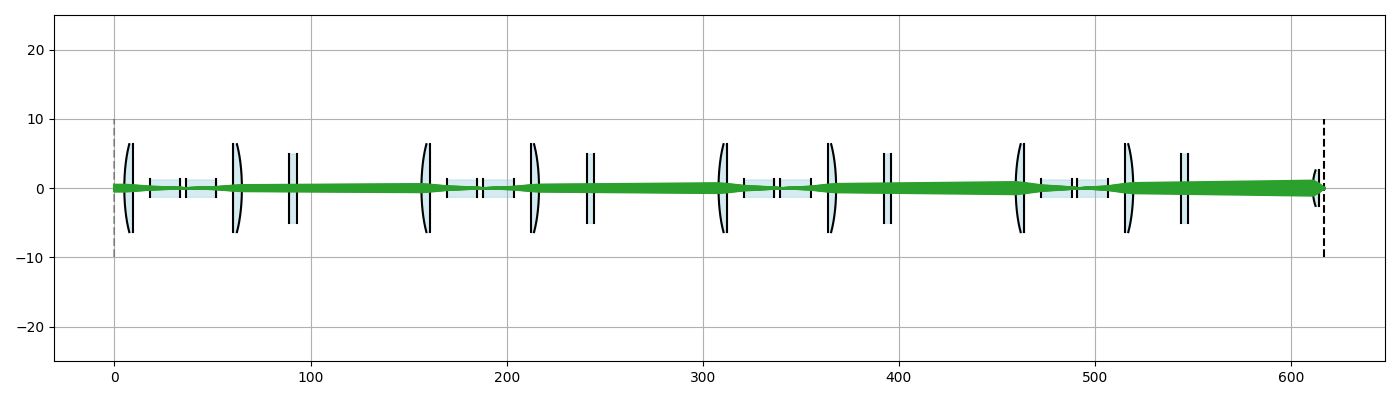

In [94]:
n_rays=31
w0_mm=0.92/2 #[mm]

fig,ax= plt.subplots(figsize=(14,4), tight_layout=True)

ST_Active= True
show_obj=  False
xscale='linear'
yscale='symlog'
Lens_layout= True


fig,ax, Results= RT.plot_Gaussian_System(fig,ax, n_rays, ST_Active=ST_Active, show_obj= show_obj,xscale=xscale, yscale=xscale,
                                         solver= 'gaussian',ray_color='tab:green', lens_layout=Lens_layout,w0_mm=w0_mm, truncate_sigma_gaussian=sqrt(2))





ax.set_ylim(-25, 25)

In [93]:
Results2= [ RT.Check_Stop(result, RT.Surfaces, dz=0, ST_Active=True) for result in Results]


y_img= array([float(df["Y_mm"].iloc[-1]) for df in Results2 if "Y_mm" in df.columns])
u_img= array([float(df["U_rad"].iloc[-1]) for df in Results2 if "U_rad" in df.columns])
y_ent= array([float(df["Y_mm"].iloc[0]) for df in Results2 if "Y_mm" in df.columns])
u_ent= array([float(df["U_rad"].iloc[0]) for df in Results2 if "U_rad" in df.columns])

y_obj, u_obj, weight= RT.gaussian_beam_rays(n_rays, w0_mm,truncate_sigma=sqrt(2))

T= RT.system_transmission(y_fib,y_ent, y_img, "2fib", weight )
eta = RT.fiber_coupling_1D(y_img, u_img, wavelength_um=1.55, MFD_um=5.1, weight_rays=weight)

print(eta)

0.682575918268004


In [64]:
y_img

array([ 48.65491257,  20.53908548,  13.44948145,   8.36570714,
         4.03791435,   0.        ,  -4.03791435,  -8.36570714,
       -13.44948145, -20.53908548, -48.65491257])

In [66]:
u_img

array([ 0.46397595,  0.20825604,  0.13751276,  0.08586853,  0.04152549,
        0.        , -0.04152549, -0.08586853, -0.13751276, -0.20825604,
       -0.46397595])

In [88]:
array([2.13471929e-05, 3.40034886e-02, 8.56007535e-02, 1.31603652e-01, 1.62281711e-01, 1.72978096e-01, 1.62281711e-01, 1.31603652e-01, 8.56007535e-02, 3.40034886e-02, 2.13471929e-05])

array([2.13471929e-05, 3.40034886e-02, 8.56007535e-02, 1.31603652e-01,
       1.62281711e-01, 1.72978096e-01, 1.62281711e-01, 1.31603652e-01,
       8.56007535e-02, 3.40034886e-02, 2.13471929e-05])

In [68]:
import numpy as np

def fiber_coupling_1D(y_img, u_img, wavelength_um, MFD_um, weight_rays=None):
    """
    Compute 1D fiber coupling using the overlap integral method.
    Only ignores rays that are NaN.

    Parameters
    ----------
    y_img : array-like [mm]
        Ray heights at the fiber/image plane (can contain NaN for blocked rays)
    u_img : array-like [rad]
        Ray angles at the fiber/image plane (can contain NaN for blocked rays)
    wavelength_um : float
        Wavelength in µm
    MFD_um : float
        Mode field diameter of the fiber in µm
    weight_rays : array-like, optional
        Launch weights per ray. Default = equal weights

    Returns
    -------
    eta : float
        Fiber coupling efficiency (0..1)
    """
    y_img = np.asarray(y_img)
    u_img = np.asarray(u_img)
    
    # Mask out rays that are NaN
    mask = ~np.isnan(y_img) & ~np.isnan(u_img)
    y_img = y_img[mask]
    u_img = u_img[mask]

    if len(y_img) == 0:
        return 0.0  # no rays reach the fiber

    lam = wavelength_um * 1e-3  # mm
    k = 2 * np.pi / lam
    w_f = (MFD_um / 2) * 1e-3  # fiber mode radius in mm

    # Use provided weights or equal weights
    if weight_rays is None:
        w_launch = np.ones(len(y_img))
    else:
        w_launch = np.asarray(weight_rays, dtype=float)[mask]

    # Ray field with phase tilt
    E_beam = w_launch * np.exp(1j * k * u_img * y_img)

    # Fiber Gaussian mode field
    E_fiber = np.exp(-(y_img ** 2) / (w_f ** 2))

    # Overlap integral
    num = np.abs(np.sum(E_beam * np.conj(E_fiber))) ** 2
    denom = np.sum(np.abs(E_beam) ** 2) * np.sum(np.abs(E_fiber) ** 2)

    return num / denom


In [70]:
fiber_coupling_1D(y_img, u_img, 1.55,1.1, weight)

0.2229636979452552

In [67]:
weight

array([2.13471929e-05, 3.40034886e-02, 8.56007535e-02, 1.31603652e-01,
       1.62281711e-01, 1.72978096e-01, 1.62281711e-01, 1.31603652e-01,
       8.56007535e-02, 3.40034886e-02, 2.13471929e-05])

In [136]:
wl= 0.486133
y_ray_ent= 10
dist= 1e20
t_ast=10

object_height=2*0
reverse=False


RT= RayTracing(object_height=object_height, wl_um=wl,beam_radius=y_ray_ent, Obj_2_Ent_tickness=dist,Ent_thickness=t_ast)


RT.add_surface(curvature_radius= 33.166,thickness=12, aperture_Radius=11,material='N-BK7', surface_type='sph', stop_size=11)
RT.add_surface(curvature_radius= -102.564,thickness=42.169,aperture_Radius=11,material='air' , surface_type='sph', stop_size=11)
RT.set_Stop(10.5, 1)

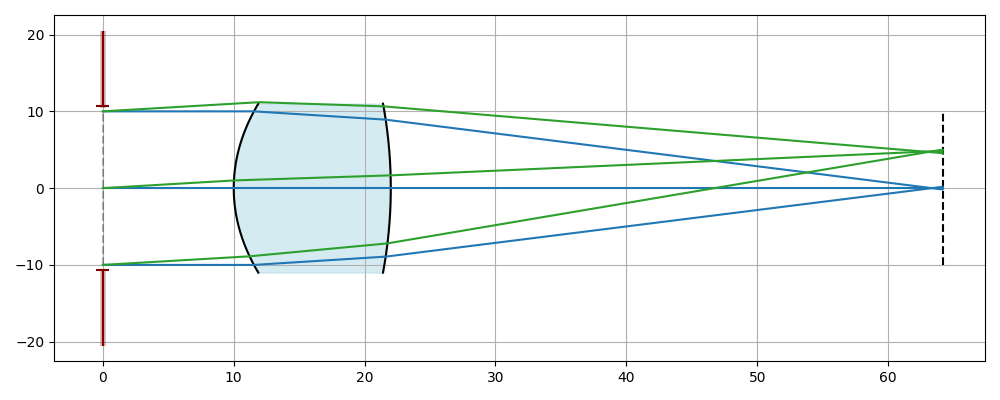

In [139]:
fig,ax= plt.subplots(figsize=(10,4), tight_layout=True)

ST_Active= True
show_obj=  True
xscale='linear'
yscale='linear'
Lens_layout= True

fig,ax, Results= RT.Plot_System(fig,ax, 3, ST_Active=ST_Active, show_obj= False,xscale=xscale, yscale=xscale,
                                solver= 'default',ray_color='tab:blue', lens_layout=Lens_layout)


wl= 0.587562

RT2= RayTracing(object_height=object_height, wl_um=wl,beam_radius=y_ray_ent, Obj_2_Ent_tickness=dist,Ent_thickness=t_ast)


RT2.add_surface(curvature_radius= 33.166,thickness=12, aperture_Radius=11,material='N-BK7', surface_type='sph', stop_size=11)
RT2.add_surface(curvature_radius= -102.564,thickness=42.169,aperture_Radius=11,material='air' , surface_type='sph', stop_size=11)

fig,ax, Results= RT2.Plot_System(fig,ax, 3, ST_Active=ST_Active, show_obj= False,xscale=xscale, yscale=xscale,
                                solver= 'arbitrary',ray_color='tab:green', lens_layout=False, y_mm=10, h_obj=-1e19)


In [161]:
wl= 0.587562
y_ray_ent= 5
dist= 1e20
t_ent=0

reverse=False


RT= RayTracing(object_height=object_height, wl_um=wl,beam_radius=y_ray_ent, Obj_2_Ent_tickness=dist,Ent_thickness=t_ent)


RT.add_surface(curvature_radius= 22.014,thickness=3.259, aperture_Radius=9,material='SK16', surface_type='sph', stop_size=9)
RT.add_surface(curvature_radius= -435.76,thickness=6.008,aperture_Radius=9,material='air' , surface_type='sph', stop_size=9)

RT.add_surface(curvature_radius= -22.213,thickness=1, aperture_Radius=4,material='F2', surface_type='sph', stop_size=4)
RT.add_surface(curvature_radius= 20.292,thickness=4.75,aperture_Radius=4,material='air' , surface_type='sph', stop_size=4)

RT.add_surface(curvature_radius= 79.684,thickness=2.952, aperture_Radius=7,material='SK16', surface_type='sph', stop_size=7)
RT.add_surface(curvature_radius= -18.395,thickness=42.208,aperture_Radius=7,material='air' , surface_type='sph', stop_size=7)
RT.set_Stop(10.5, 1)

(-10.0, 10.0)

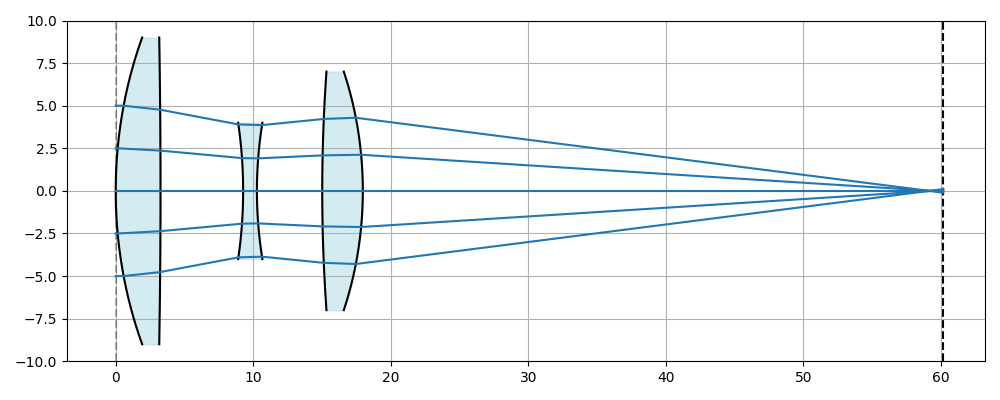

In [162]:
fig,ax= plt.subplots(figsize=(10,4), tight_layout=True)

ST_Active= True
show_obj=  True
xscale='linear'
yscale='linear'
Lens_layout= True

fig,ax, Results= RT.Plot_System(fig,ax, 5, ST_Active=ST_Active, show_obj= False,xscale=xscale, yscale=xscale,
                                solver= 'default',ray_color='tab:blue', lens_layout=Lens_layout)
ax.set_ylim(-10, 10)